# Read Data

In [174]:
import numpy as np

In [175]:
import pandas as pd

df = pd.read_csv('../Dataset/dailyActivity_merged.csv')
dfmet = pd.read_csv('../Dataset/minuteMETsNarrow_merged.csv')

In [176]:
df['ActivityDate'] = pd.to_datetime(df['ActivityDate']).dt.date

Gabungkan dengan data MET, digroup menggunakan total dan mean.

In [177]:
# Mengonversi kolom ActivityMinute ke format datetime dan ekstrak tanggalnya
dfmet['ActivityDate'] = pd.to_datetime(dfmet['ActivityMinute'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce').dt.date

daily_mets = dfmet.groupby(['Id', 'ActivityDate']).agg(
    Avg_METs=('METs', 'mean'),
    Total_MET=('METs', 'sum')
).reset_index()

In [178]:
df = pd.merge(df, daily_mets, on=['Id', 'ActivityDate'], how='left')


In [179]:
df.tail()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Avg_METs,Total_MET
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,16.159722,23270.0
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,21.006944,30250.0
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,16.066667,23136.0
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,21.754167,31326.0
939,8877689391,2016-05-12,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.00,23,1,137,770,1849,16.277381,13673.0


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [181]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Avg_METs,Total_MET
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,934.000000,934.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,14.663956,20848.806210
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,2.903261,4568.041281
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,600.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,12.710243,17907.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,14.696181,21060.500000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,16.406771,23562.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,25.775694,37117.000000


In [182]:
def percent_null(series):
    return

def percent_null(series):
    total_nulls = (series.isnull() | (series == ' ')).sum()

    percent = (total_nulls / len(series)) * 100

    if percent == 0:
        return '0'
    else:
        return f'{percent:.2f}'

summary_data = []

for col in df.columns:
    column_summary = {
        'Column Name': col,
        '%null': str(percent_null(df[col]))+"%",
        'dtype': df[col].dtype,
        'count': df[col].count(),
        'nunique': df[col].nunique(),
        'mode': df[col].mode().values if not df[col].mode().empty else None,
        'unique value': list(df[col].value_counts().to_dict().keys())
    }
    summary_data.append(column_summary)
pd.DataFrame(summary_data)

,Column Name,%null,dtype,count,nunique,mode,unique value
0,Id,0%,int64,940,33,"[1503960366, 1624580081, 1844505072, 192797227...","[1503960366, 4319703577, 8583815059, 837856320..."
1,ActivityDate,0%,object,940,31,"[2016-04-12, 2016-04-13, 2016-04-14, 2016-04-15]","[2016-04-12, 2016-04-14, 2016-04-15, 2016-04-1..."
2,TotalSteps,0%,int64,940,842,[0],"[0, 244, 6708, 9167, 6175, 10538, 1510, 8538, ..."
3,TotalDistance,0%,float64,940,615,[0.0],"[0.0, 2.59999990463257, 0.0099999997764825, 3...."
4,TrackerDistance,0%,float64,940,613,[0.0],"[0.0, 2.59999990463257, 0.0099999997764825, 3...."
5,LoggedActivitiesDistance,0%,float64,940,19,[0.0],"[0.0, 2.0921471118927, 2.25308108329773, 4.081..."
6,VeryActiveDistance,0%,float64,940,333,[0.0],"[0.0, 0.0700000002980232, 0.0599999986588955, ..."
7,ModeratelyActiveDistance,0%,float64,940,211,[0.0],"[0.0, 0.200000002980232, 0.280000001192093, 0...."
8,LightActiveDistance,0%,float64,940,491,[0.0],"[0.0, 4.17999982833862, 3.17000007629395, 4.88..."
9,SedentaryActiveDistance,0%,float64,940,9,[0.0],"[0.0, 0.0099999997764825, 0.0199999995529652, ..."


In [183]:
df = df.drop(columns='Id')

# Data Cleansing

## Handle duplicated data

In [184]:
print('Duplicate data:', len(df) - len(df.drop_duplicates()))

Duplicate data: 1


Membuang satu kolom duplikat.

In [185]:
df = df.drop_duplicates()

## Handle Missing Values

Seperti terlihat pada section sebelumnya, ada 0.64% null pada kolom Avg_MET dan Total_MET. Karene persentasenya sangat kecil, cukup gunakan median.

In [186]:
df['Avg_METs'] = df['Avg_METs'].fillna(df['Avg_METs'].median())
df['Total_MET'] = df['Total_MET'].fillna(df['Total_MET'].median())

Cek lagi untuk memastikan

In [187]:
str(percent_null(df['Avg_METs']))+"%", str(percent_null(df['Total_MET']))+"%"

('0%', '0%')

## Handle outliers

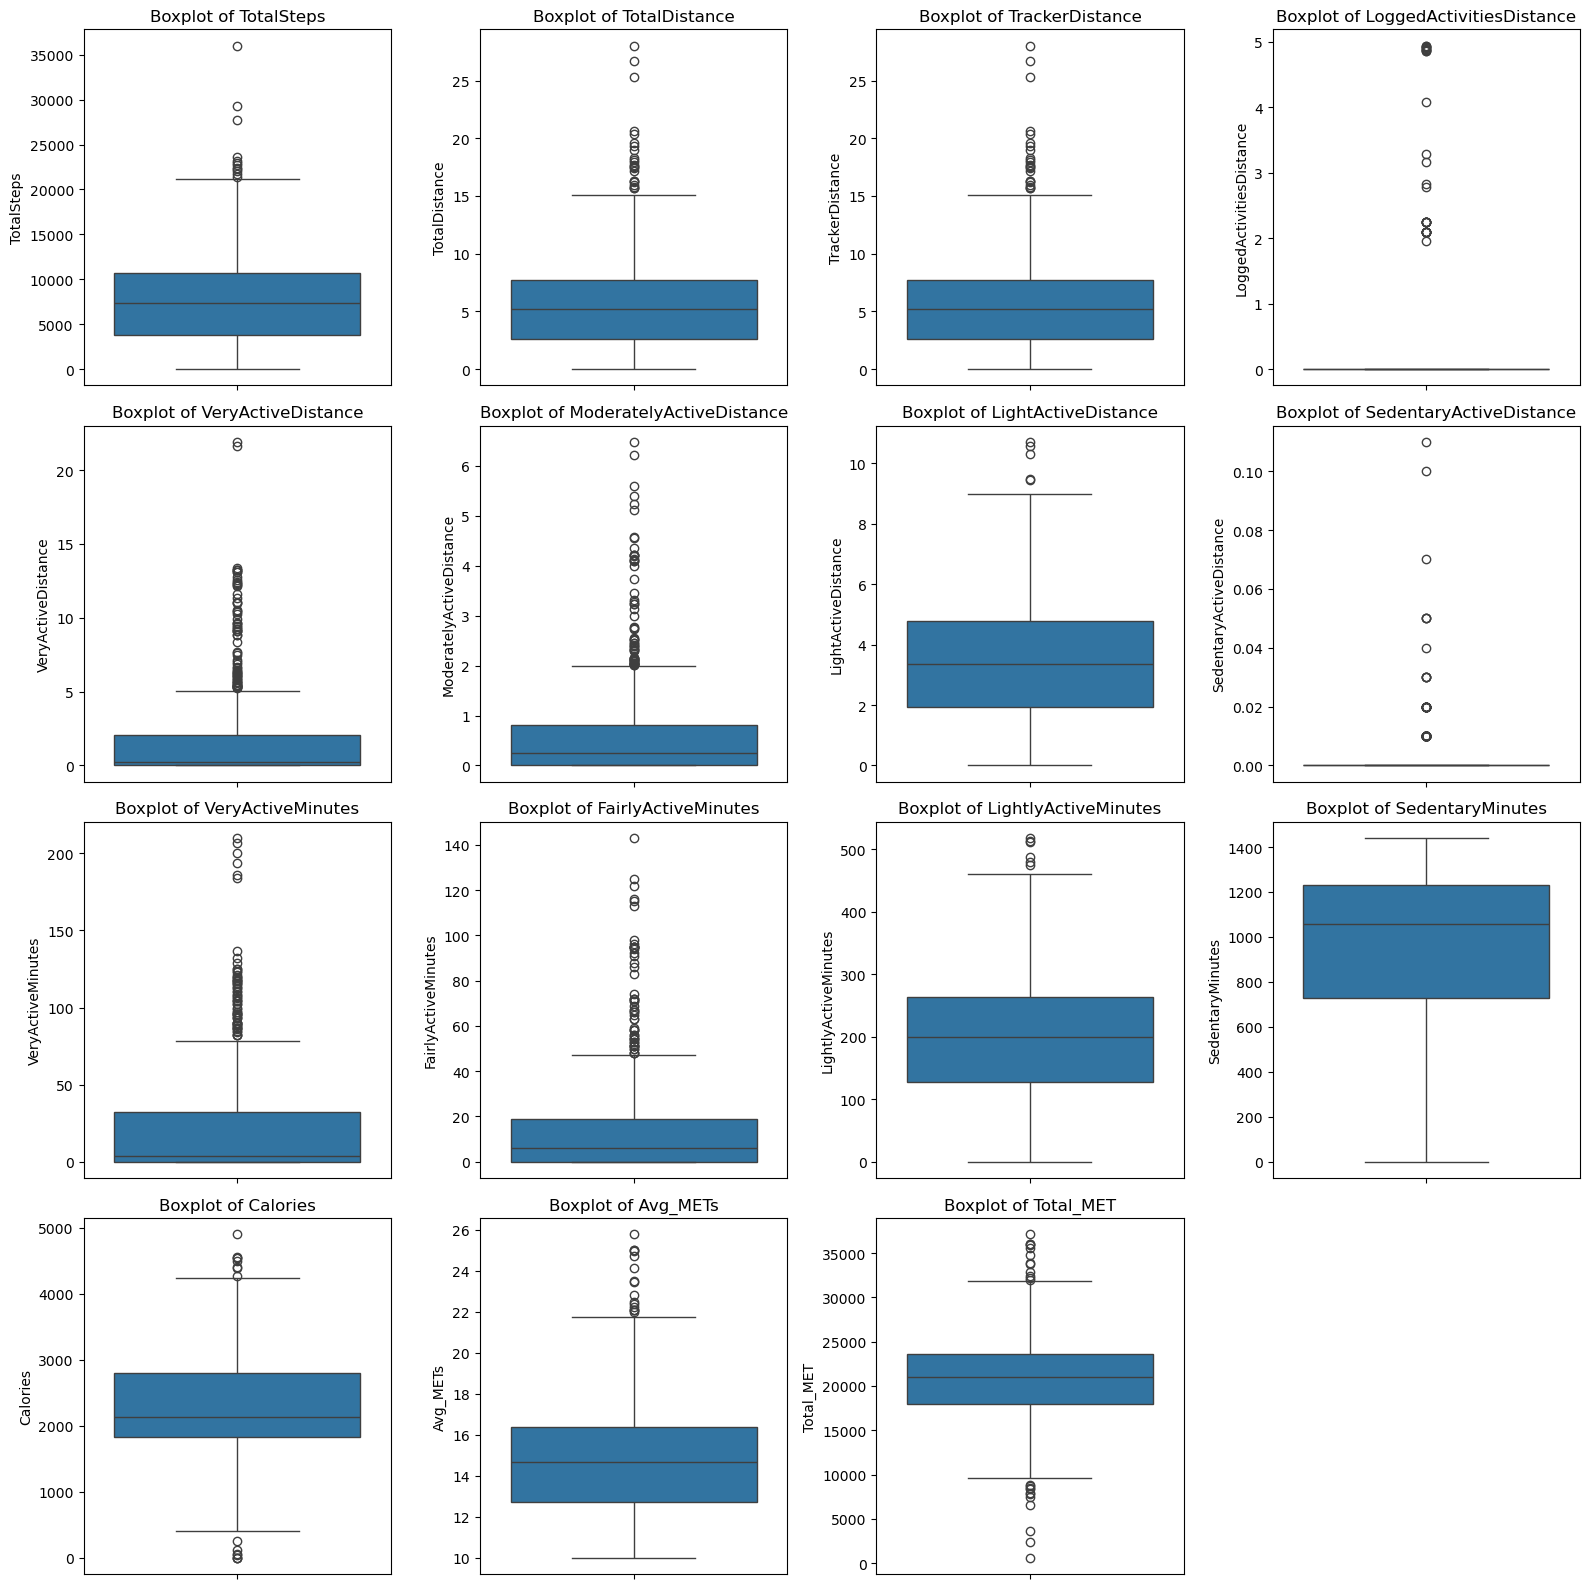

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=4, nrows=4,  figsize=(16,16))
axes = axes.flatten()
# Membuat boxplot untuk setiap kolom numerik
for i, col in enumerate(df.iloc[:, 1:].columns.tolist()):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel('')

# Turn off remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
# Menyesuaikan tata letak agar tidak saling tumpang tindih
plt.tight_layout()
plt.show()

In [189]:
col_with_outliers = [ 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'Calories']

### Hapus dengan z-score

In [190]:
for col in col_with_outliers:
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())  # Calculate Z-scores for each column
    dfz = df[(z_scores > -3) & (z_scores < 3)]

In [191]:
dfz = dfz.reset_index()
dfz = dfz.drop(columns='index')
dfz

,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Avg_METs,Total_MET
0,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,17.528472,25241.0
1,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,15.874306,22859.0
2,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,15.686806,22589.0
3,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,15.409722,22190.0
4,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,16.454167,23694.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,16.159722,23270.0
924,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,21.006944,30250.0
925,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,16.066667,23136.0
926,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,21.754167,31326.0


In [192]:
print("Jumlah Data yang Hilang: "+str(len(df)-len(dfz)))

Jumlah Data yang Hilang: 11


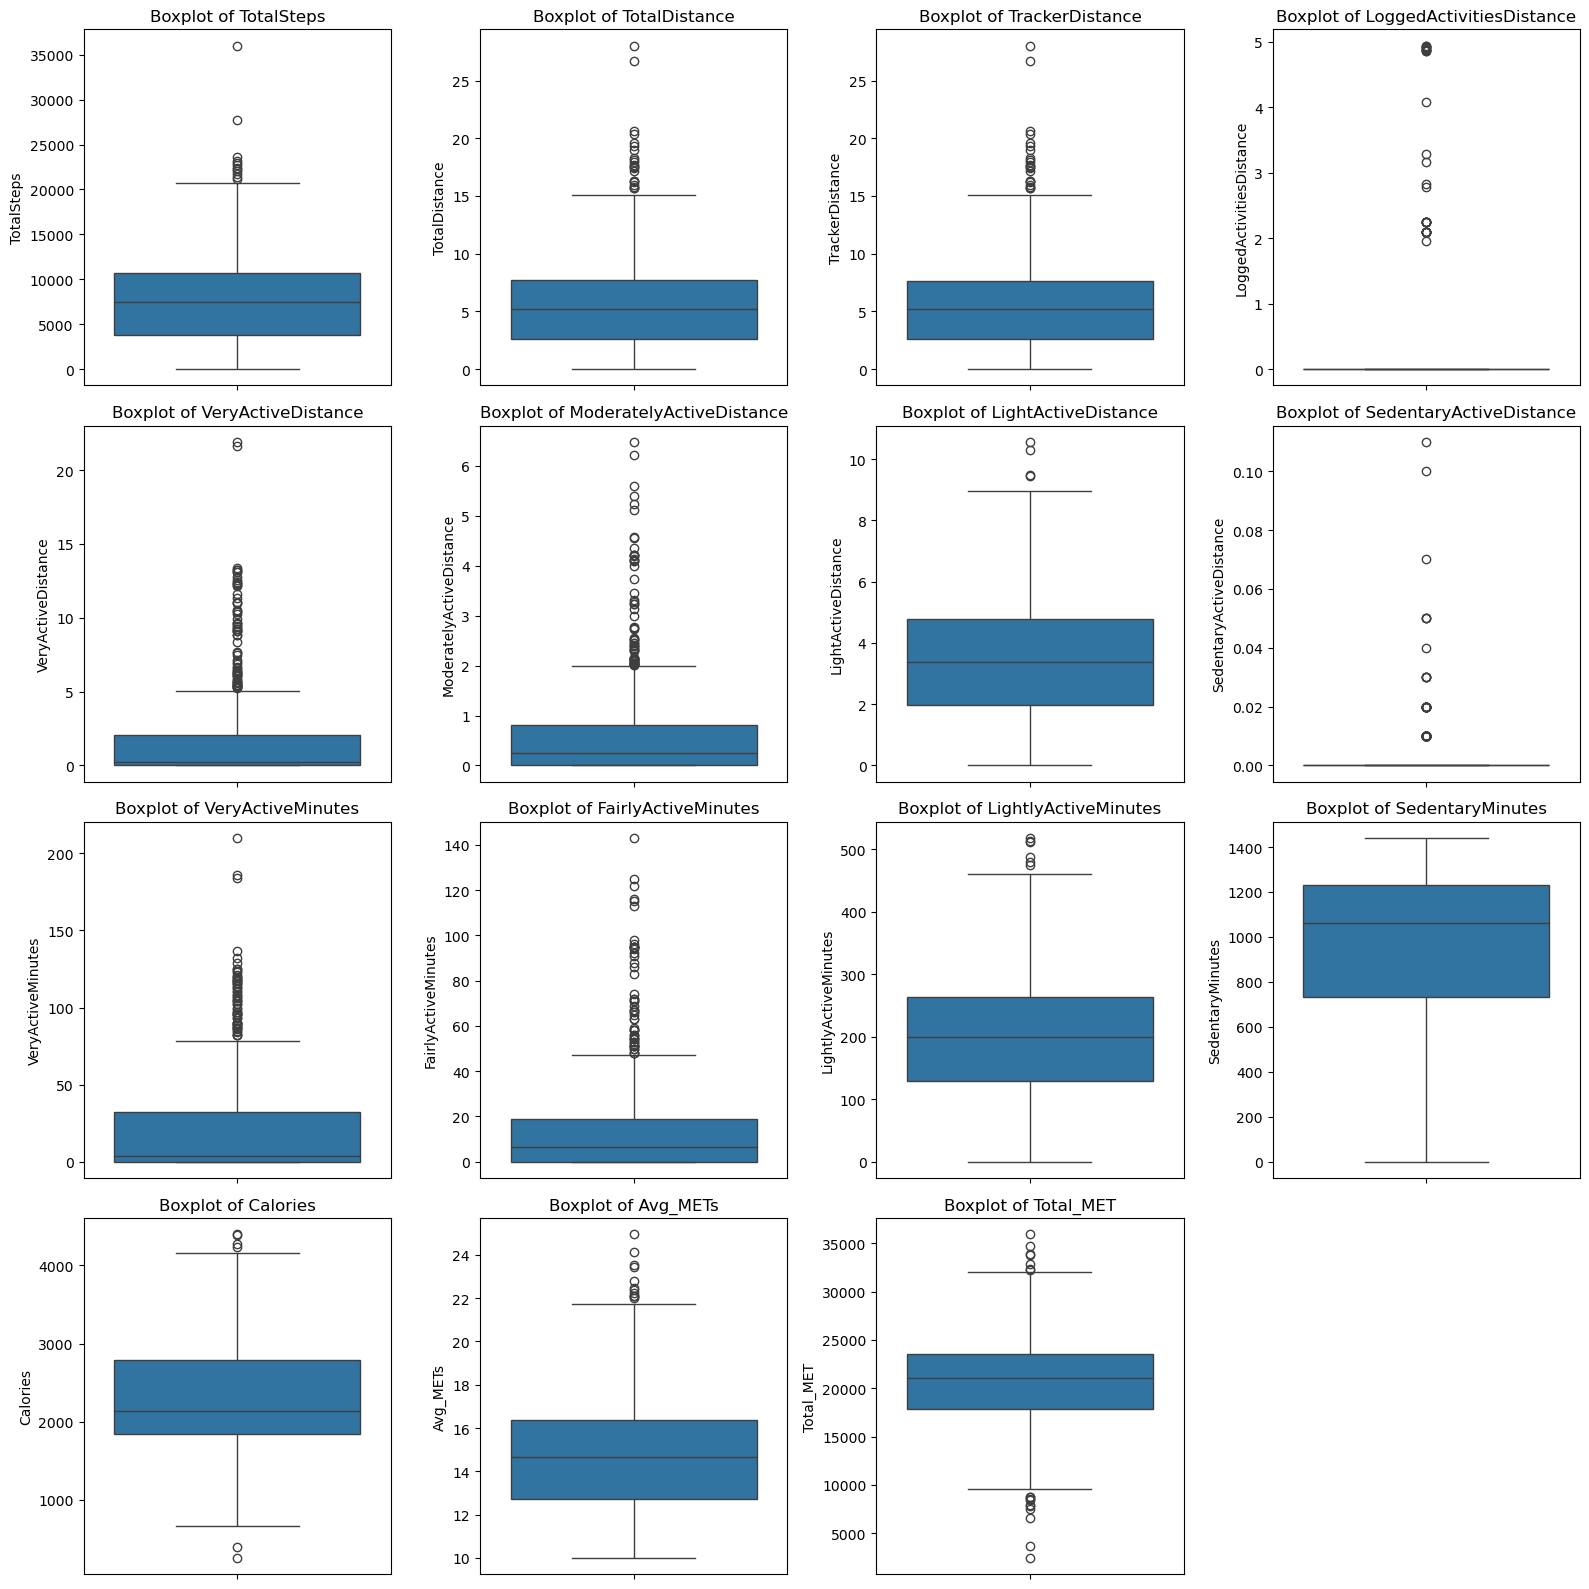

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=4, nrows=4,  figsize=(16,16))
axes = axes.flatten()
# Membuat boxplot untuk setiap kolom numerik
for i, col in enumerate(dfz.iloc[:, 1:].columns.tolist()):
    sns.boxplot(data=dfz, y=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel('')

# Turn off remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
# Menyesuaikan tata letak agar tidak saling tumpang tindih
plt.tight_layout()
plt.show()

### Hapus dengan IQR

In [194]:
for col in col_with_outliers:
    Q1 = df[col].quantile(0.25)  # Calculate Q1 for the column
    Q3 = df[col].quantile(0.75)  # Calculate Q3 for the column
    IQR = Q3 - Q1  # Calculate IQR for the column
    
    # Apply IQR method to filter out outliers for this specific column
    df_iqr = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

In [195]:
df_iqr = df_iqr.reset_index()
df_iqr = df_iqr.drop(columns='index')
df_iqr

,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Avg_METs,Total_MET
0,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,17.528472,25241.0
1,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,15.874306,22859.0
2,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,15.686806,22589.0
3,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,15.409722,22190.0
4,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,16.454167,23694.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,16.159722,23270.0
920,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,21.006944,30250.0
921,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,16.066667,23136.0
922,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,21.754167,31326.0


In [196]:
print("Jumlah Data yang Hilang: "+str(len(df)-len(df_iqr)))

Jumlah Data yang Hilang: 15


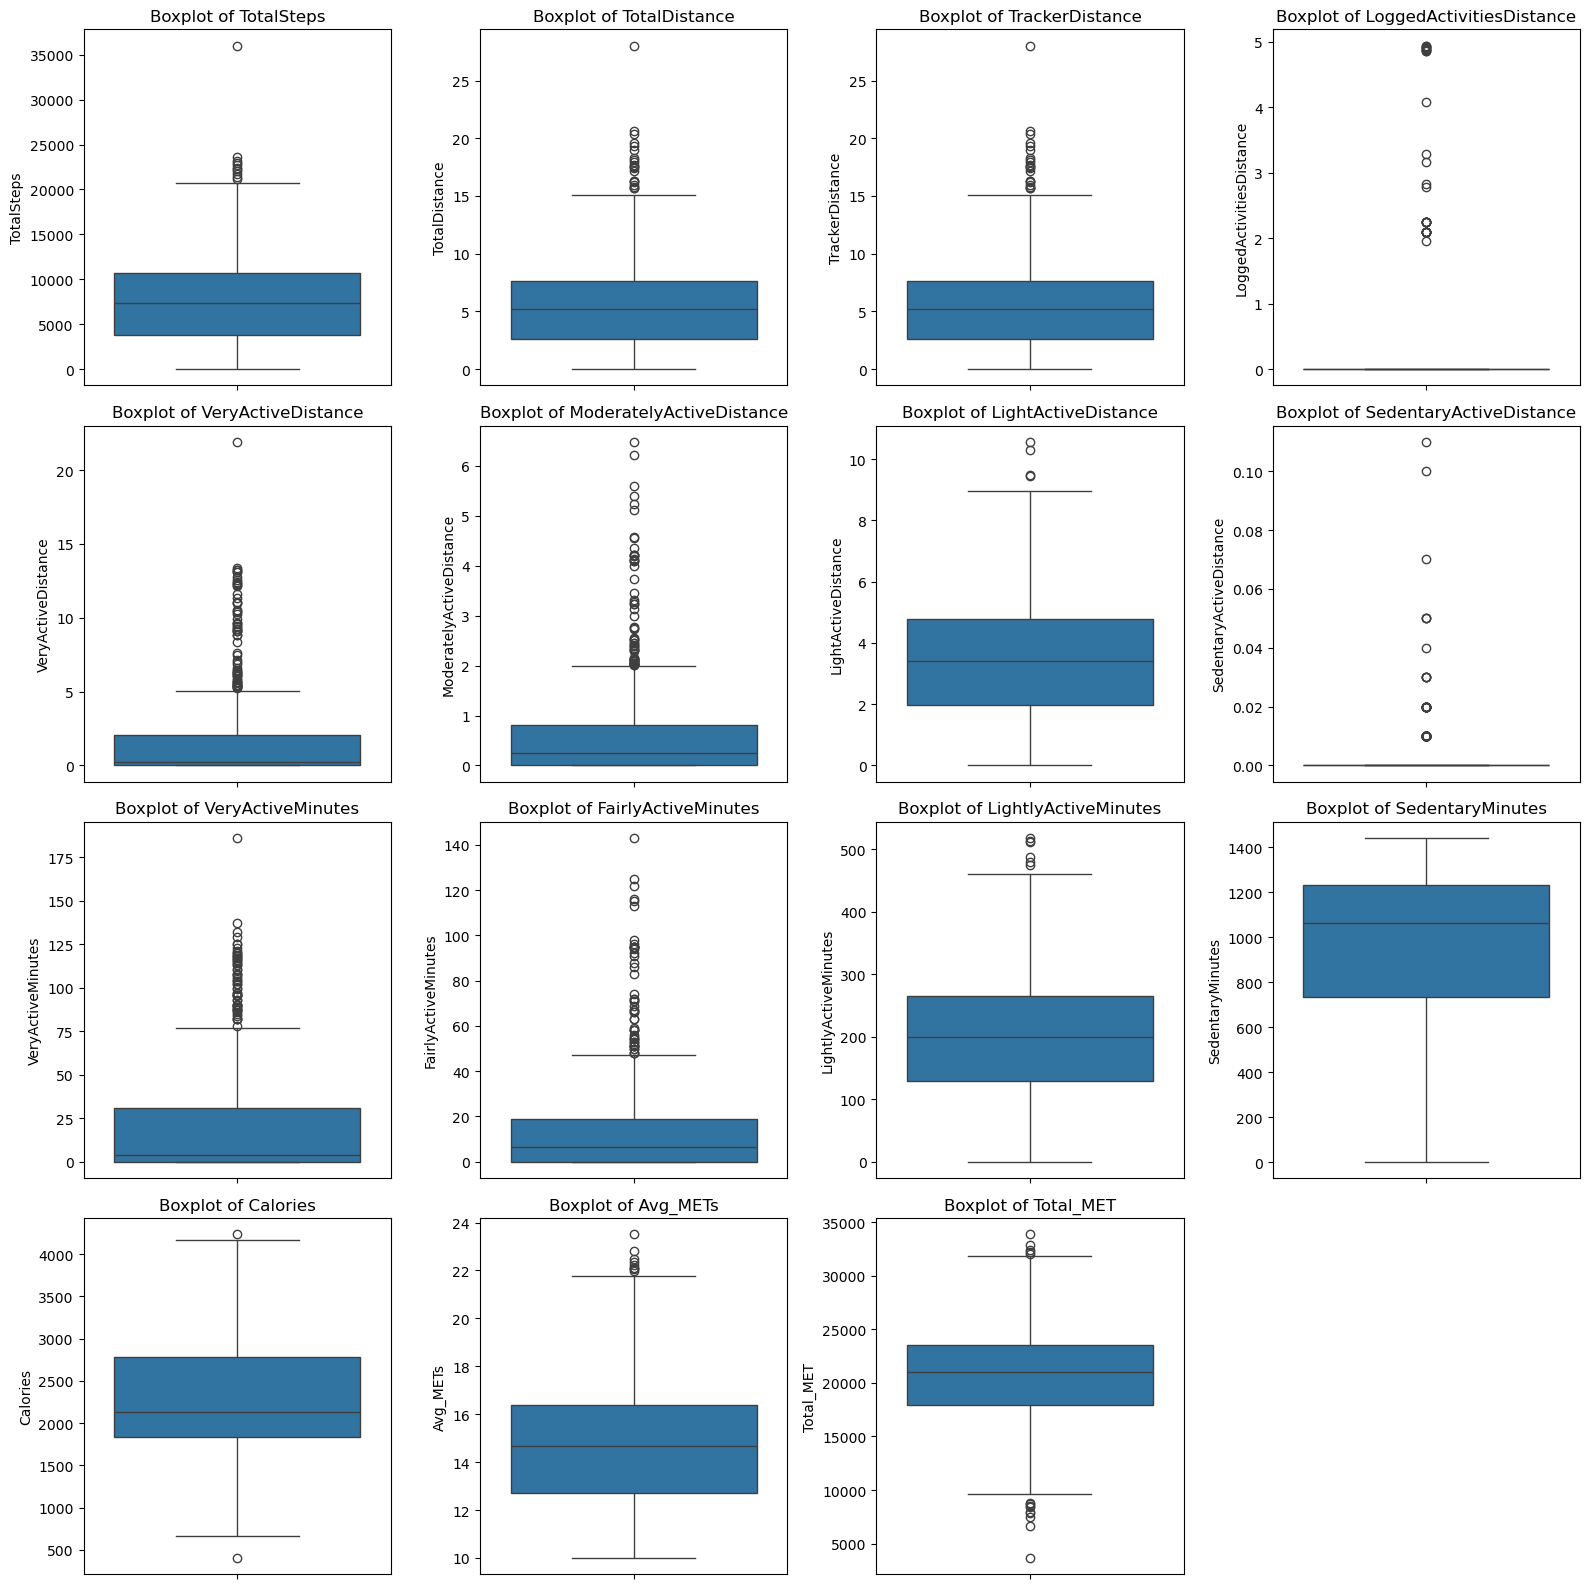

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=4, nrows=4,  figsize=(16,16))
axes = axes.flatten()
# Membuat boxplot untuk setiap kolom numerik
for i, col in enumerate(df_iqr.iloc[:, 1:].columns.tolist()):
    sns.boxplot(data=df_iqr, y=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel('')

# Turn off remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
# Menyesuaikan tata letak agar tidak saling tumpang tindih
plt.tight_layout()
plt.show()

### Tanpa hapus outlier, transform data pakai log_transform

In [198]:
dft = df.copy()
dft[col_with_outliers] = df[col_with_outliers].apply(lambda x: np.log(x + 1))

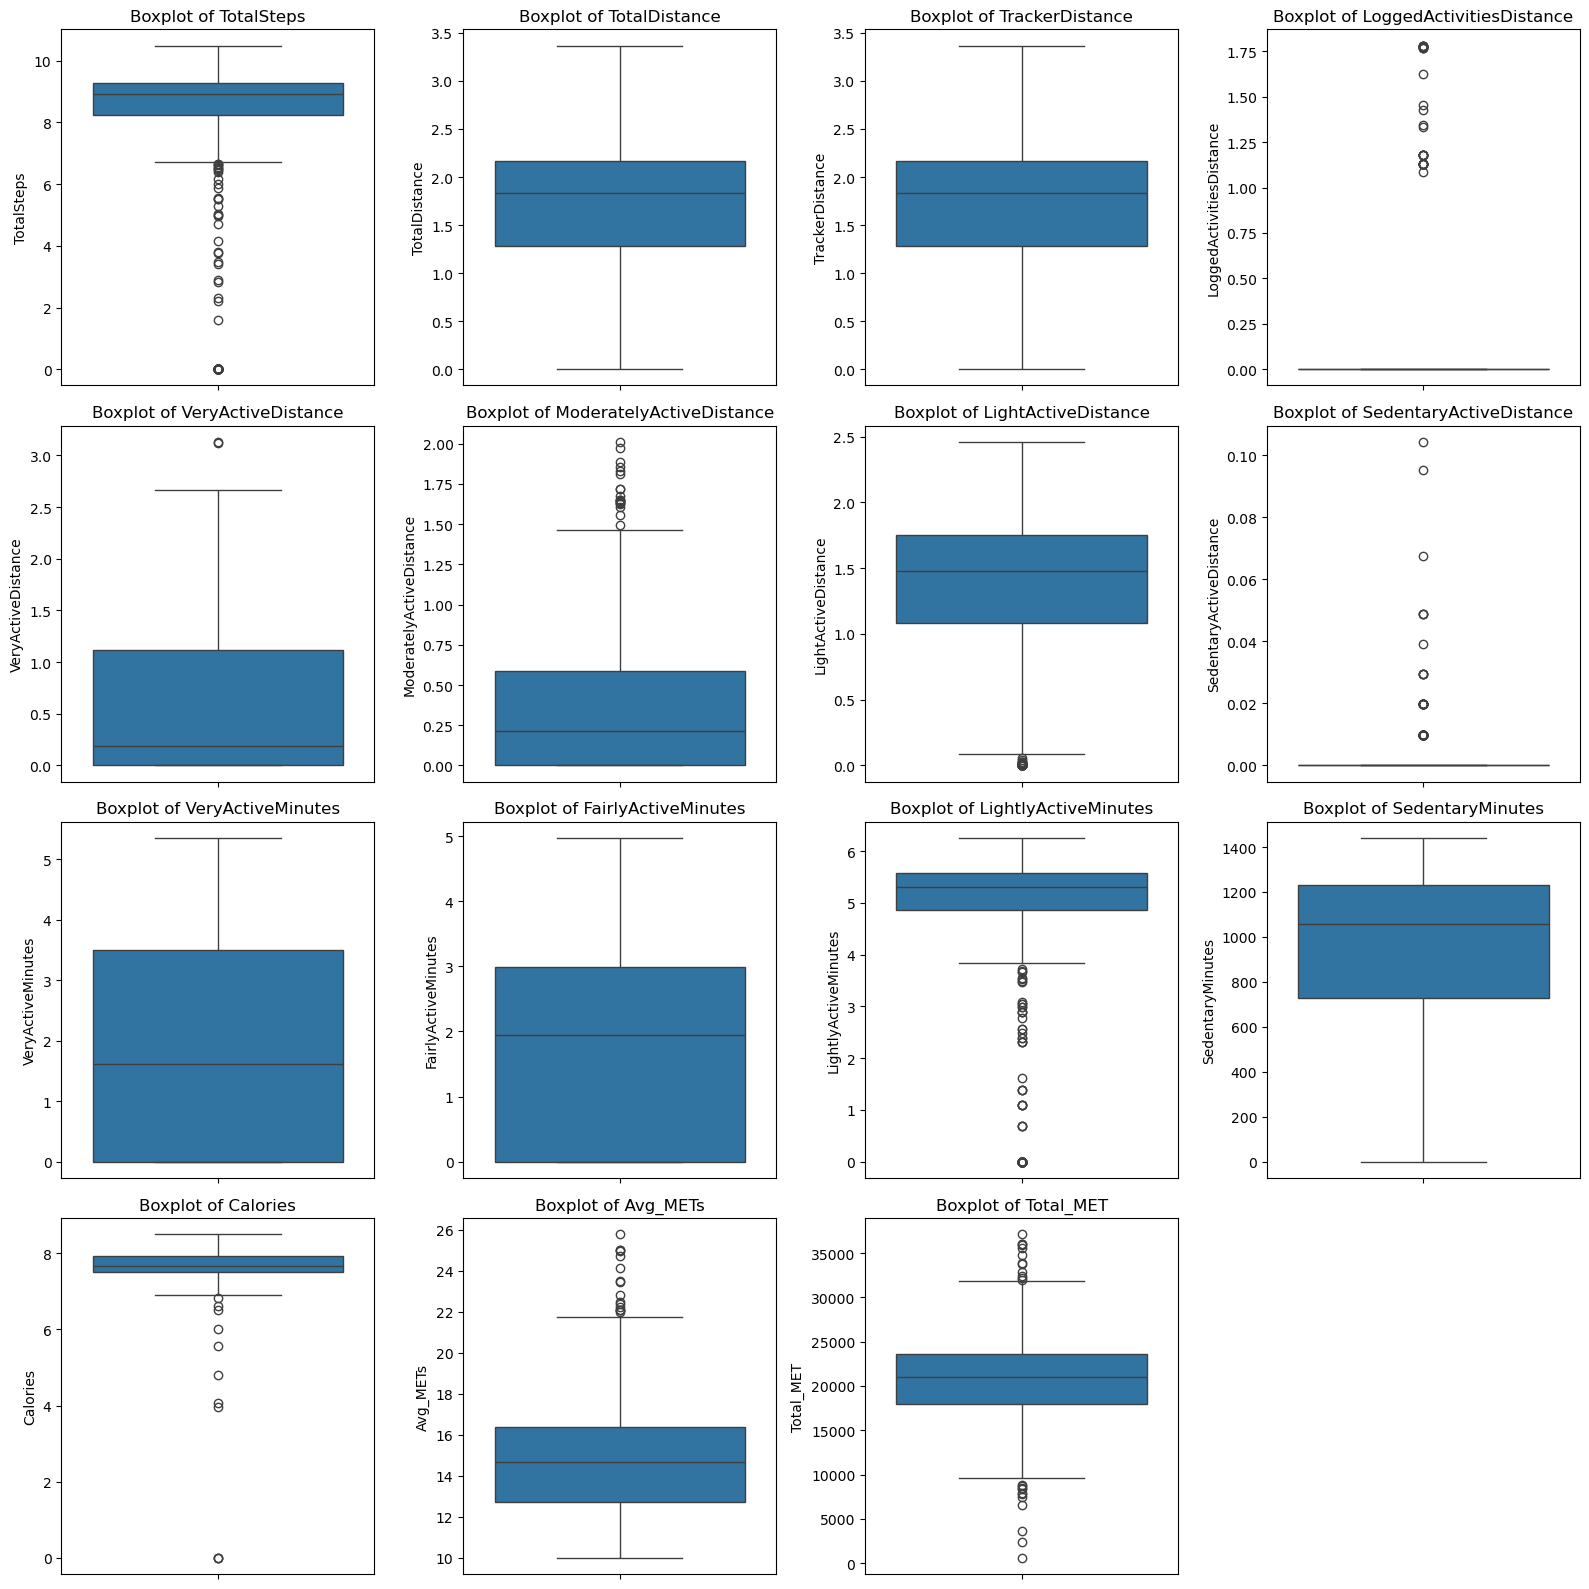

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=4, nrows=4,  figsize=(16,16))
axes = axes.flatten()
# Membuat boxplot untuk setiap kolom numerik
for i, col in enumerate(dft.iloc[:, 1:].columns.tolist()):
    sns.boxplot(data=dft, y=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel('')

# Turn off remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
# Menyesuaikan tata letak agar tidak saling tumpang tindih
plt.tight_layout()
plt.show()

In [200]:
print("Jumlah Data yang Hilang: "+str(len(df)-len(dft)))

Jumlah Data yang Hilang: 0


### Hapus dengan Clustering DBScan

In [201]:
from sklearn.cluster import DBSCAN

def dbscan_outlier_removal(df, col, eps=0.5, min_samples=5):
    # Reshape the column data for DBSCAN (DBSCAN expects a 2D array)
    column_data = df[col].values.reshape(-1, 1)
    
    # Apply DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(column_data)
    
    # DBSCAN assigns -1 to noise (outliers)
    df_cleaned = df[labels != -1]  # Keep only rows that are not outliers
    return df_cleaned

# Copy the original DataFrame to df_db (to retain non-outlier columns)
df_db = df.copy()

# Apply DBSCAN to only the columns listed in col_with_outliers
# col_with_outliers_nobest = ['TotalSteps','ModeratelyActiveDistance','LightlyActiveMinutes','LoggedActivitiesDistance','SedentaryActiveDistance']

df_db = dbscan_outlier_removal(df_db, 'TotalSteps', eps=200, min_samples=5)
df_db = dbscan_outlier_removal(df_db, 'TotalDistance', eps=0.1, min_samples=5)
df_db = dbscan_outlier_removal(df_db, 'TrackerDistance', eps=0.1, min_samples=5)
df_db = dbscan_outlier_removal(df_db, 'LoggedActivitiesDistance', eps=0.001, min_samples=5)
df_db = dbscan_outlier_removal(df_db, 'VeryActiveDistance', eps=0.04, min_samples=5)
df_db = dbscan_outlier_removal(df_db, 'ModeratelyActiveDistance', eps=0.02, min_samples=5)
df_db = dbscan_outlier_removal(df_db, 'LightlyActiveMinutes', eps=2, min_samples=5)
df_db = dbscan_outlier_removal(df_db, 'SedentaryActiveDistance', eps=0.0001, min_samples=5)
df_db = dbscan_outlier_removal(df_db, 'VeryActiveMinutes', eps=3, min_samples=5)
df_db = dbscan_outlier_removal(df_db, 'FairlyActiveMinutes', eps=2, min_samples=5) #kalau kebanyakan data yg kebuang jadi 1
df_db = dbscan_outlier_removal(df_db, 'LightActiveDistance', eps=0.04, min_samples=5)
df_db = dbscan_outlier_removal(df_db, 'Calories', eps=15, min_samples=5)

#### Untuk mengecek nearest neighbor (untuk dapat epsilon)

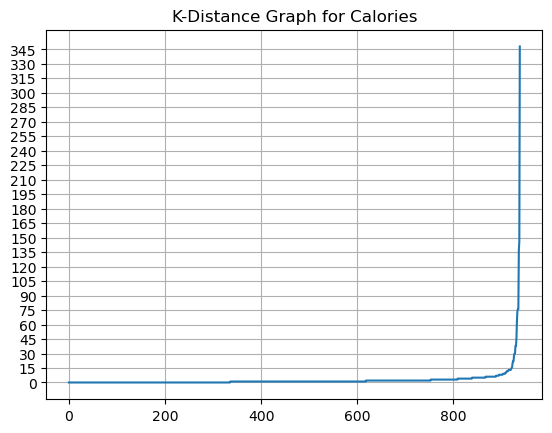

In [202]:
from sklearn.neighbors import NearestNeighbors
# Example for TotalSteps column
col = 'Calories'
column_data = df[[col]].values  # Reshape to 2D array

# Use NearestNeighbors to calculate k-distance
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(column_data)
distances, indices = neighbors_fit.kneighbors(column_data)

# Sort distances and plot the k-distance graph
distances = np.sort(distances[:, 1], axis=0)
plt.yticks(np.arange(0, max(distances) + 1, step=15))
plt.plot(distances)
plt.title(f'K-Distance Graph for {col}')
plt.grid(visible=True)
plt.show()

In [203]:
df_db = df_db.reset_index()
df_db = df_db.drop(columns='index')
df_db.tail()

,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Avg_METs,Total_MET
565,2016-05-09,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,1440,1688,10.000000,14400.0
566,2016-04-18,11423,8.67,8.67,0.0,2.44,0.27,5.94,0.0,29,5,191,1215,2761,15.644444,22528.0
567,2016-05-01,10930,8.32,8.32,0.0,3.13,0.57,4.57,0.0,36,12,166,1226,2786,15.823611,22786.0
568,2016-05-02,4790,3.64,3.64,0.0,0.00,0.00,3.56,0.0,0,0,105,1335,2189,12.417361,17881.0
569,2016-05-12,8064,6.12,6.12,0.0,1.82,0.04,4.25,0.0,23,1,137,770,1849,16.277381,13673.0


In [204]:
print("Jumlah Data yang Hilang: "+str(len(df)-len(df_db)))

Jumlah Data yang Hilang: 369


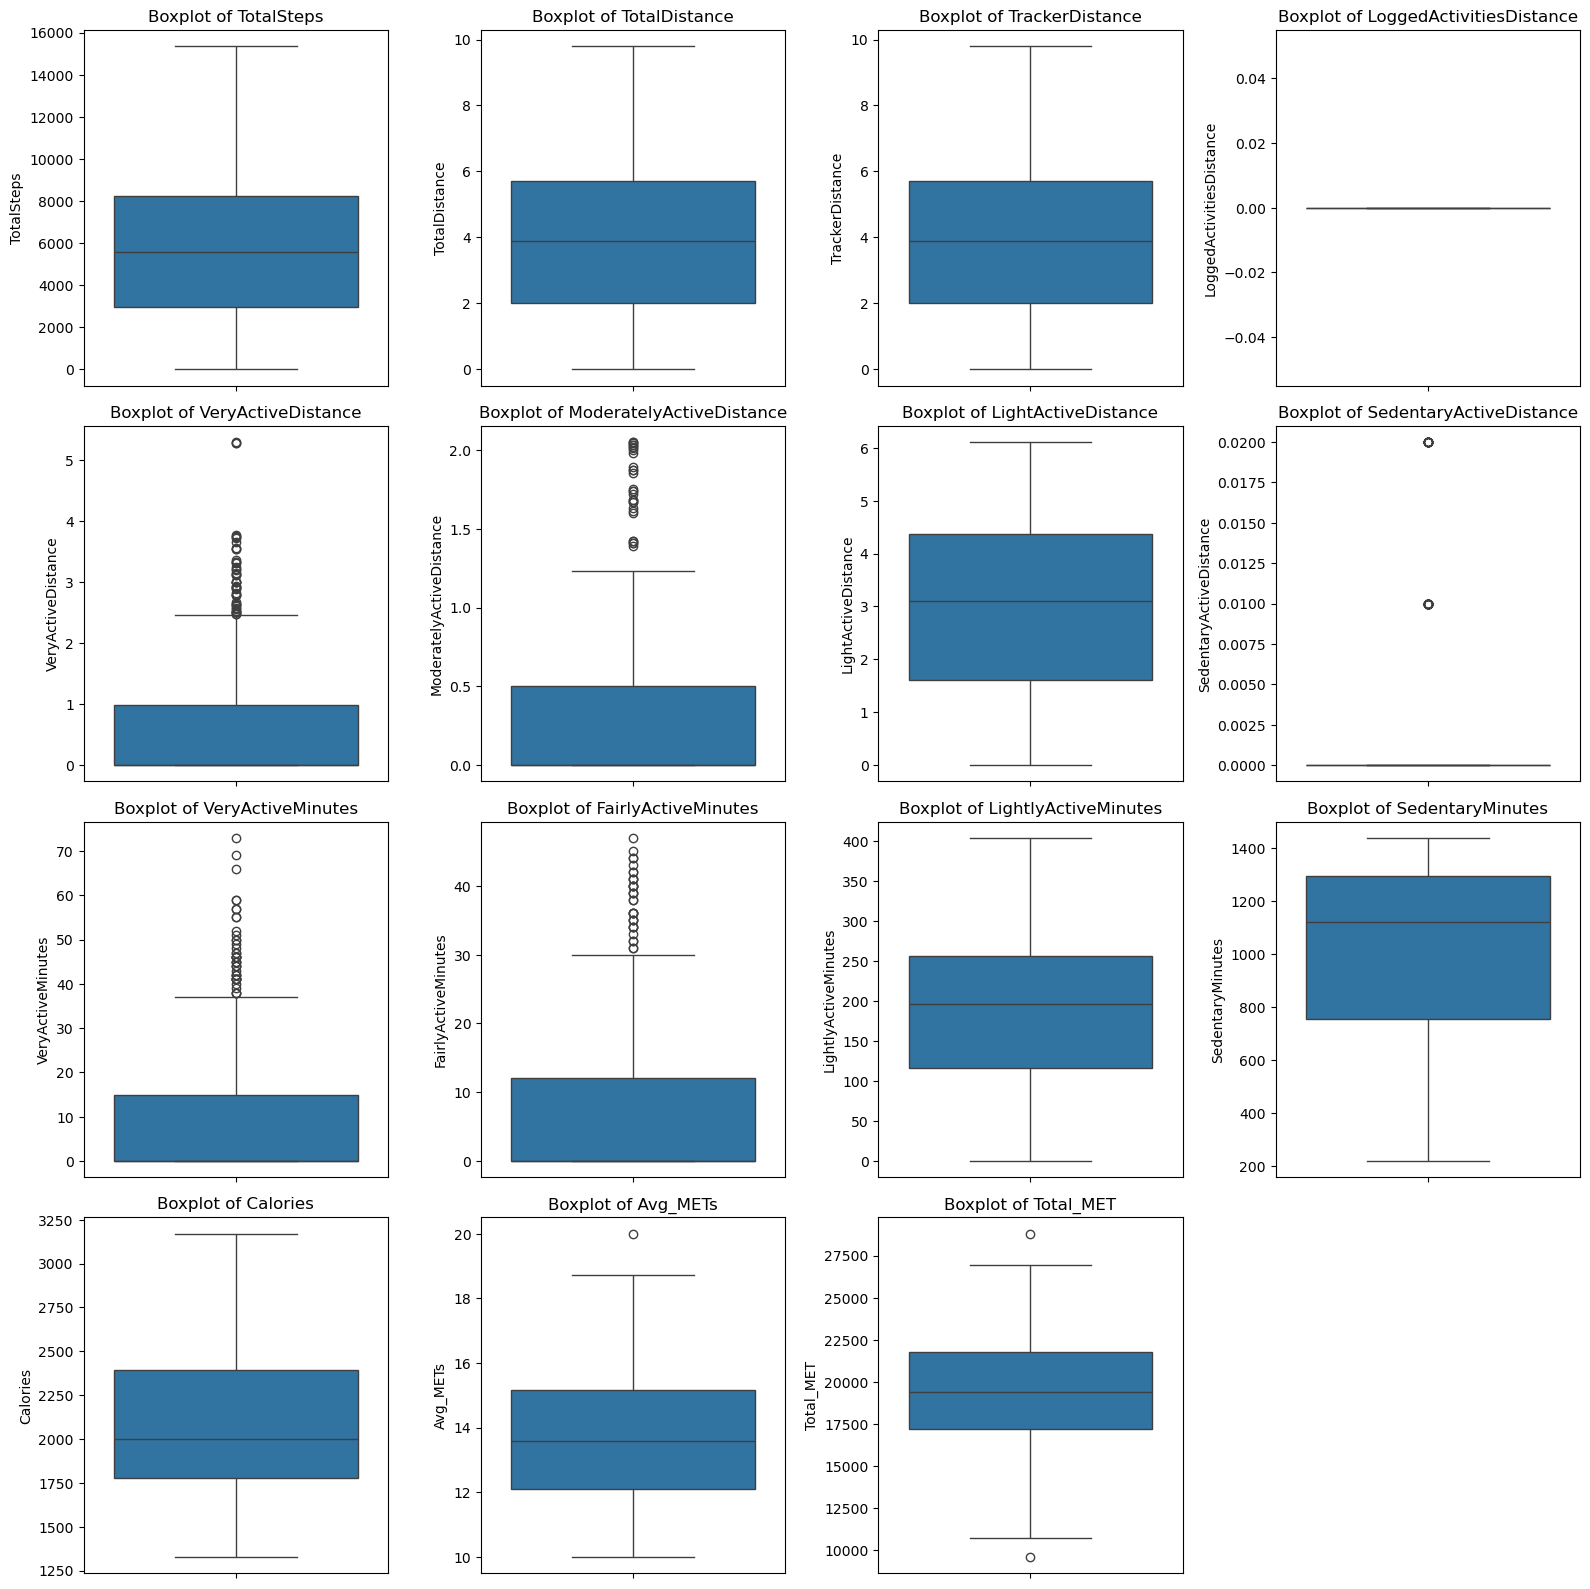

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=4, nrows=4,  figsize=(16,16))
axes = axes.flatten()
# Membuat boxplot untuk setiap kolom numerik
for i, col in enumerate(df_db.iloc[:, 1:].columns.tolist()):
    sns.boxplot(data=df_db, y=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel('')

# Turn off remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
# Menyesuaikan tata letak agar tidak saling tumpang tindih
plt.tight_layout()
plt.show()

Namun untuk case ini tidak menggunakan outlier removal karena dianggap datanya asli.

#  Feature Engineering

## Feature extraction
### Ambil nama hari, tanggal, bulan, tahun, dan isweekend.

In [206]:
df['ActivityDate'] = df['ActivityDate'].apply(pd.to_datetime)

In [207]:
df['DayOfWeek'] = df['ActivityDate'].dt.day_of_week # Monday=0, Sunday=6
df['Day'] = df['ActivityDate'].dt.day
df['Month'] = df['ActivityDate'].dt.month
df['Year'] = df['ActivityDate'].dt.year
df['is_weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x in [5, 6] else 0) 


### Ambil juga distance per step.

In [208]:
df['DistancePerStep'] = df.apply(lambda row: 0 if row['TotalSteps'] == 0 else row['TotalDistance'] / row['TotalSteps'], axis=1)

In [209]:
df = df.drop(columns='ActivityDate')

In [210]:
df.tail()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,...,SedentaryMinutes,Calories,Avg_METs,Total_MET,DayOfWeek,Day,Month,Year,is_weekend,DistancePerStep
935,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,...,1174,2847,16.159722,23270.0,6,8,5,2016,1,0.000759
936,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,...,1131,3710,21.006944,30250.0,0,9,5,2016,0,0.000902
937,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,...,1187,2832,16.066667,23136.0,1,10,5,2016,0,0.000759
938,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,...,1127,3832,21.754167,31326.0,2,11,5,2016,0,0.000913
939,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.00,23,1,...,770,1849,16.277381,13673.0,3,12,5,2016,0,0.000759


### Ambil cluster pakai gmm

Perlu discaling dulu karena range data agak berbeda jauh, terutama antara steps dan minutes.

Scaling untuk machine learning beda lagi, karena untuk machine learning itu scalingnya setelah data splitting agar tidak ada data leakage.

In [211]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

scaler_clustering = StandardScaler()

df_scaled_clustering = scaler_clustering.fit_transform(df[['TotalSteps', 'TotalDistance', 'VeryActiveDistance', 
                                                           'ModeratelyActiveDistance', 'LightActiveDistance', 
                                                           'SedentaryActiveDistance', 'VeryActiveMinutes', 
                                                           'FairlyActiveMinutes', 'LightlyActiveMinutes', 
                                                           'SedentaryMinutes', 'Avg_METs', 'Total_MET']])


#### Penentuan jumlah cluster yang optimal

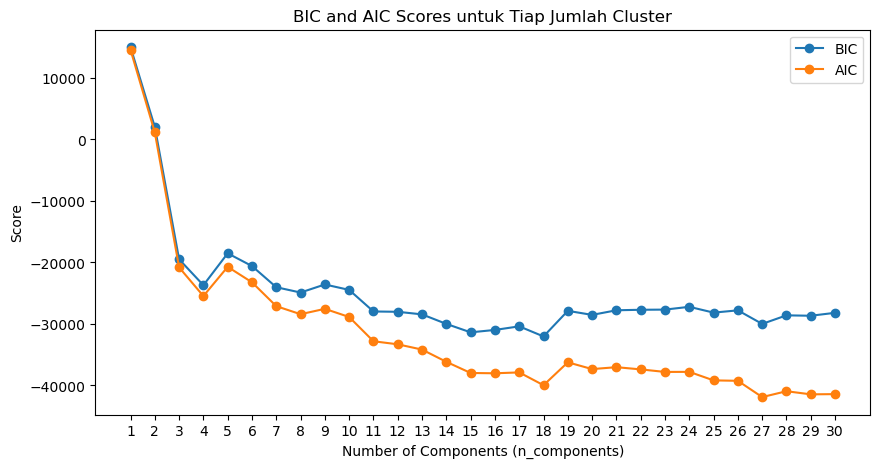

In [212]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

n_components_range = range(1, 31)  # Uji sampai n_cluster = 30 
bic_scores = []
aic_scores = []

# Hitung BIC dan AIC untuk setiap jumlah cluster
for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(df_scaled_clustering)  # Gunakan data yang sudah distandarisasi, ga pakai predict karena kita cuma perlu jumlah clusternya aja
    bic_scores.append(gmm.bic(df_scaled_clustering))
    aic_scores.append(gmm.aic(df_scaled_clustering))

# Plot BIC dan AIC untuk melihat jumlah cluster optimal
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, bic_scores, label='BIC', marker='o')
plt.plot(n_components_range, aic_scores, label='AIC', marker='o')
plt.xlabel('Number of Components (n_components)')
plt.ylabel('Score')
plt.title('BIC and AIC Scores untuk Tiap Jumlah Cluster')
plt.legend()

plt.xticks(n_components_range)  # Menampilkan hanya integer pada sumbu-x
plt.show()


In [213]:
# Menentukan jumlah cluster optimal (dengan BIC/AIC terendah)
optimal_n = n_components_range[np.argmin(bic_scores)]
print(f"Jumlah cluster optimal: {optimal_n}")

Jumlah cluster optimal: 18


Terlihat juga bahwa AIC dan BIC sama-sama rendah jika jumlah cluster ada 18.

#### Mulai Clustering

Clustering menggunakan GMM dengan hard assignment. Aslinya GMM ini menghasilkan cluster yang tumpang tindih, jadi tiap data itu bisa mempunyai lebih dari 1 Cluster. dengan hard assignment maka 1 data point punya 1 cluster.

In [214]:
gmm = GaussianMixture(n_components=optimal_n, random_state=42)
df['Cluster'] = gmm.fit_predict(df_scaled_clustering)  # Hanya simpan label cluster

#### Cek apakah kita bisa mengurutkan Clusternya agar menjadi fitur Ordinal

##### Cek dengan Boxplot

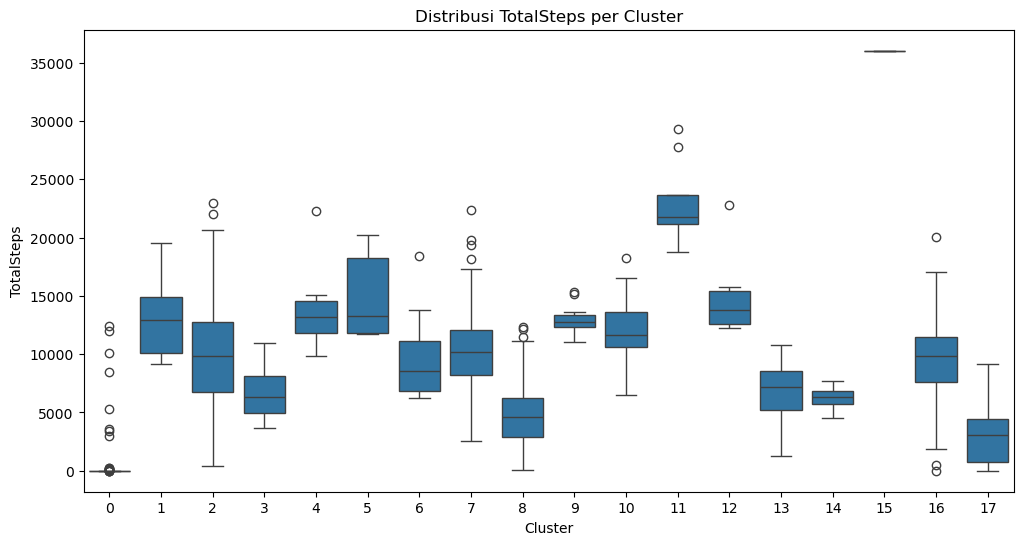

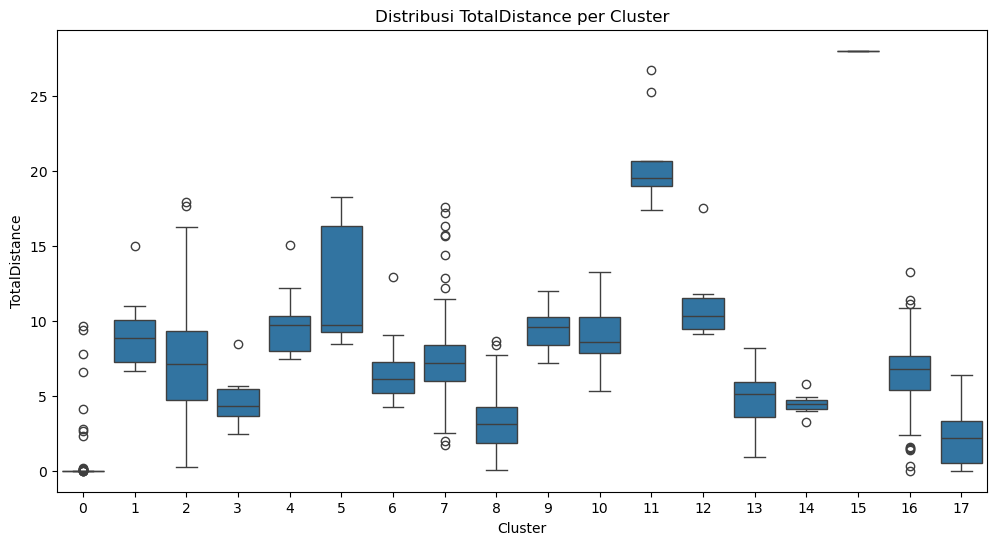

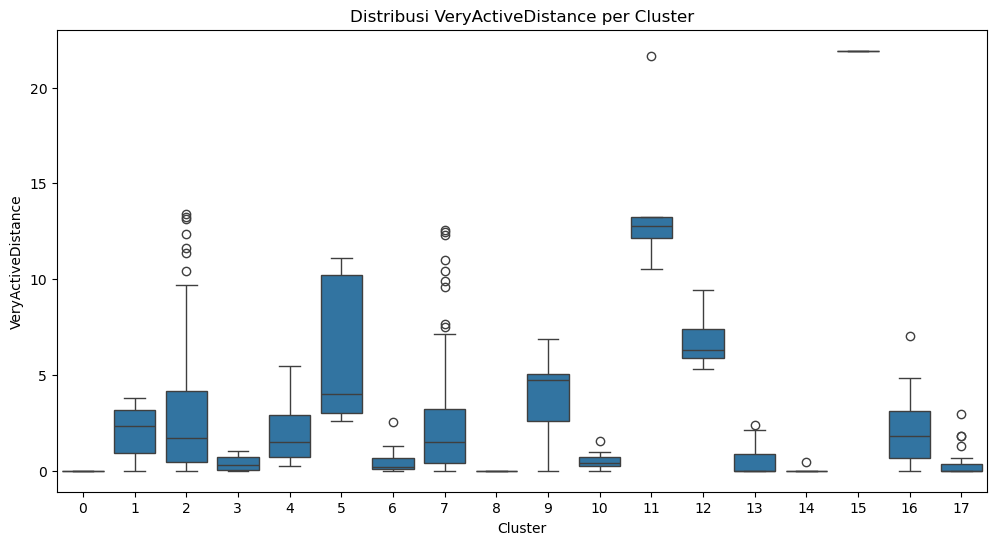

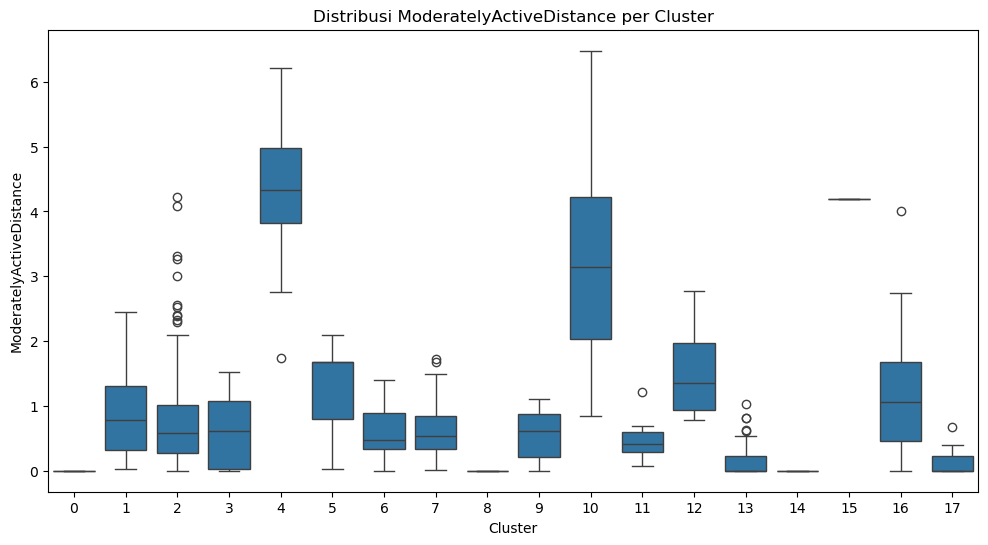

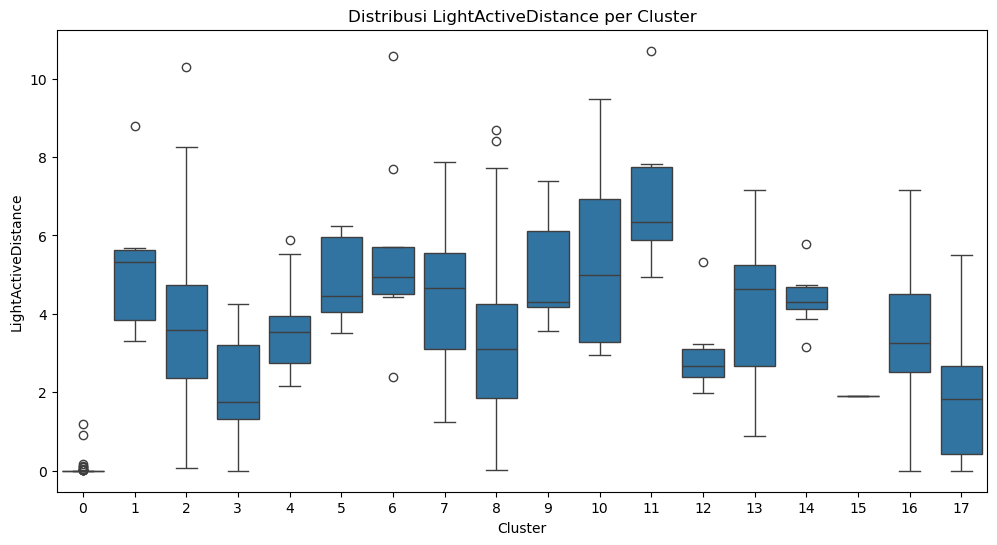

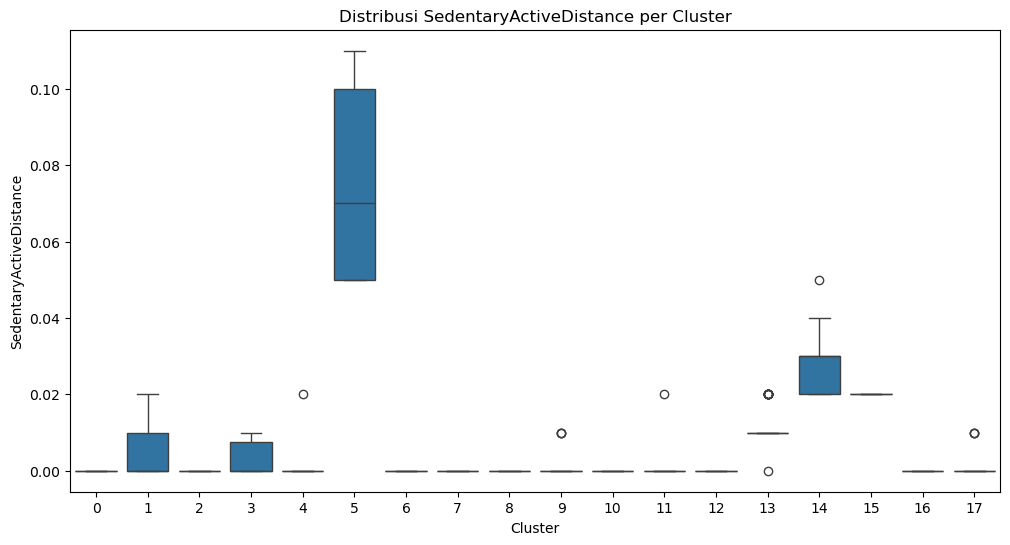

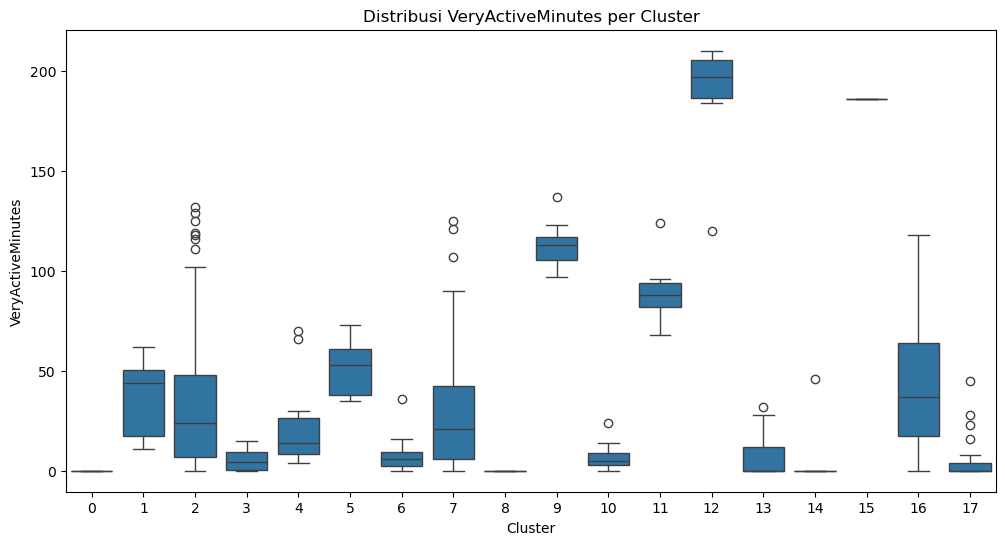

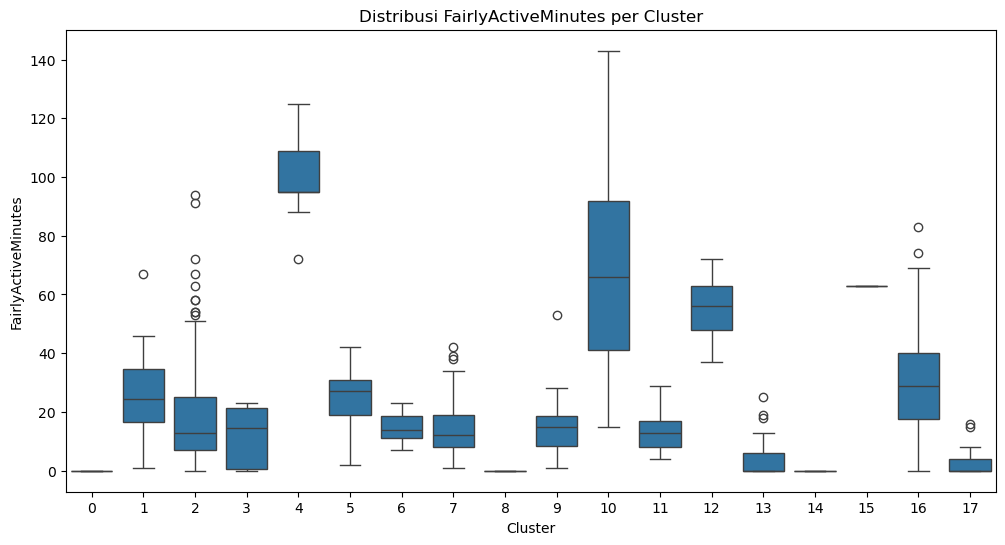

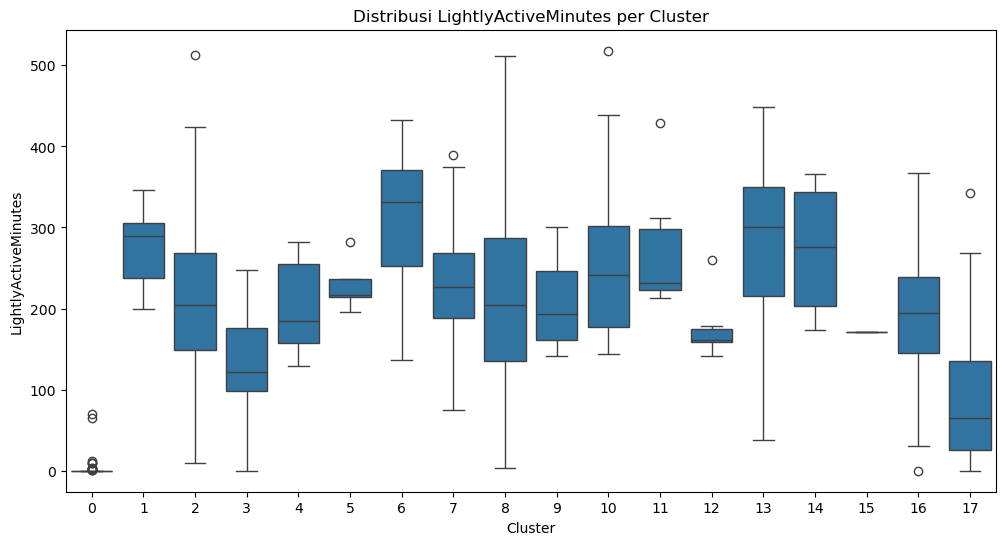

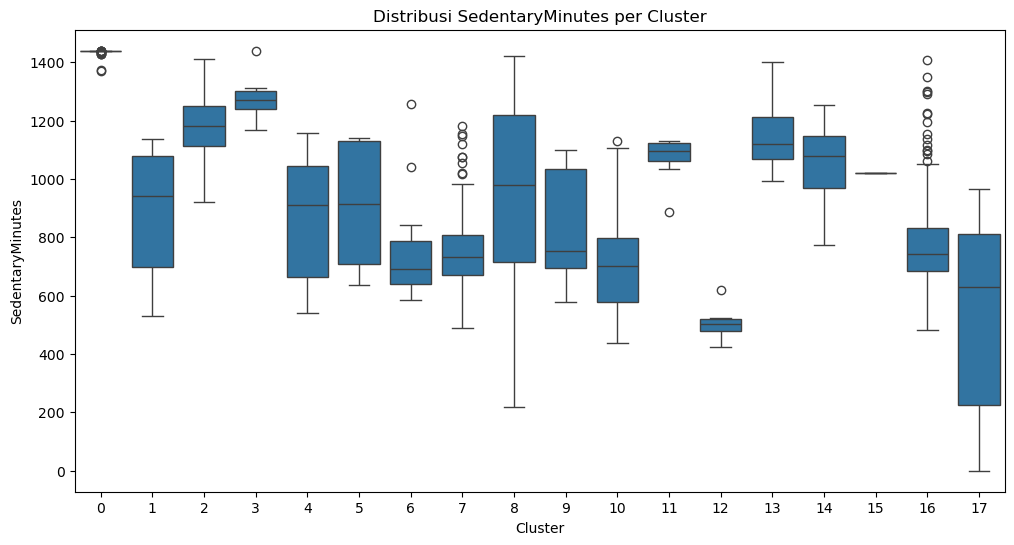

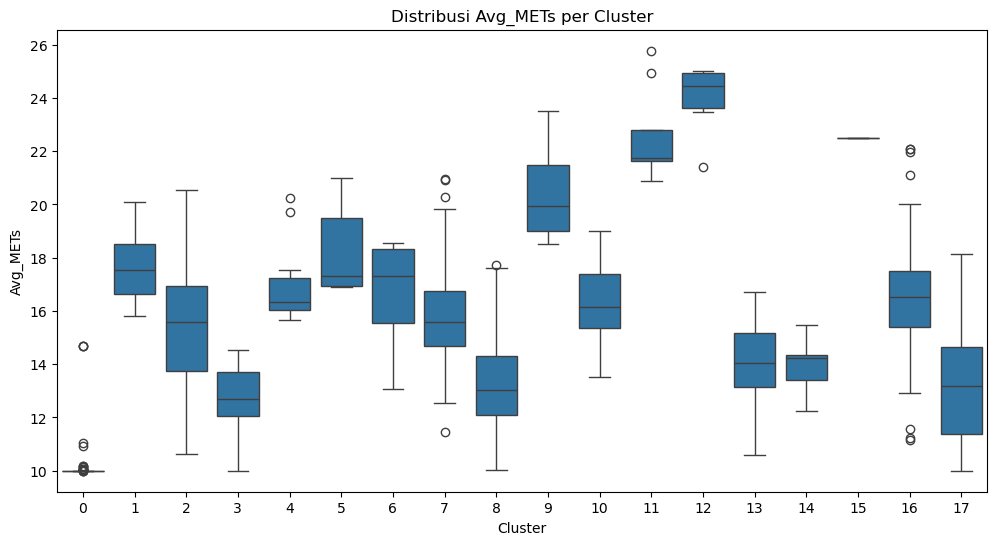

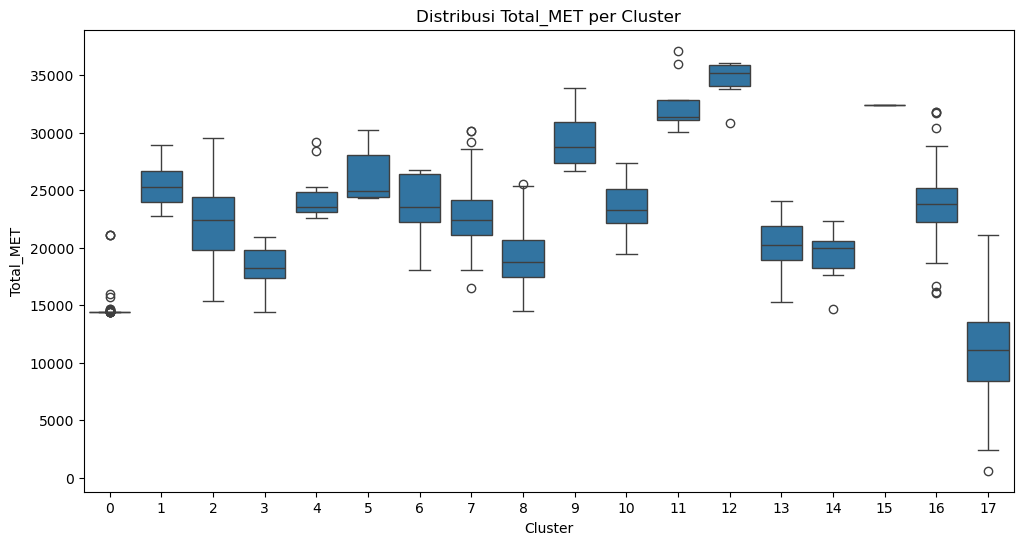

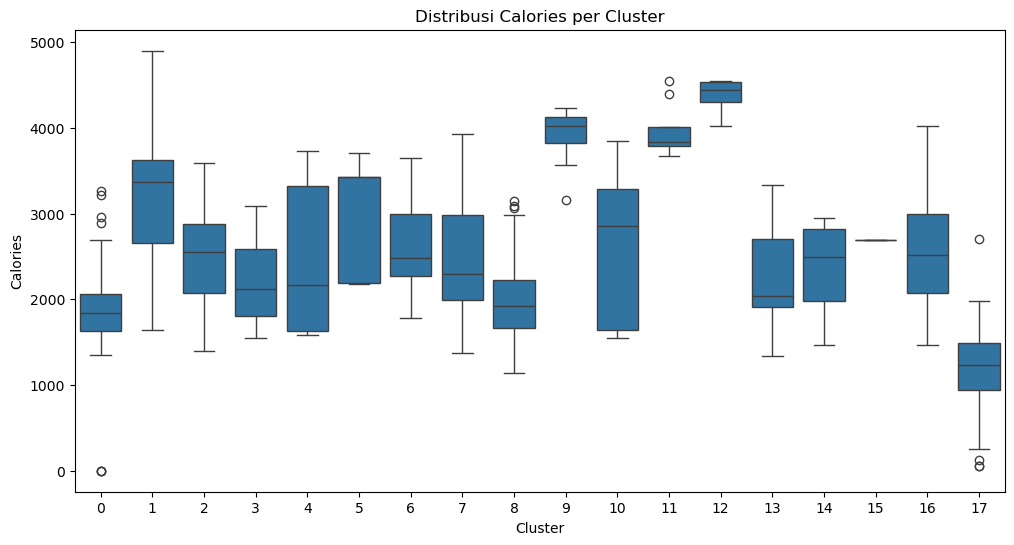

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar kolom yang akan divisualisasikan
columns_to_plot = [
    'TotalSteps', 'TotalDistance', 'VeryActiveDistance',
    'ModeratelyActiveDistance', 'LightActiveDistance',
    'SedentaryActiveDistance', 'VeryActiveMinutes',
    'FairlyActiveMinutes', 'LightlyActiveMinutes',
    'SedentaryMinutes', 'Avg_METs', 'Total_MET', 'Calories'
]

# Membuat boxplot untuk setiap kolom
for col in columns_to_plot:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Cluster', y=col, data=df)
    plt.title(f'Distribusi {col} per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.show()



Tidak ditemukan pola yang jelas pada boxplot. Mungkin coba caara lain.

##### Cek dengan Heatmap

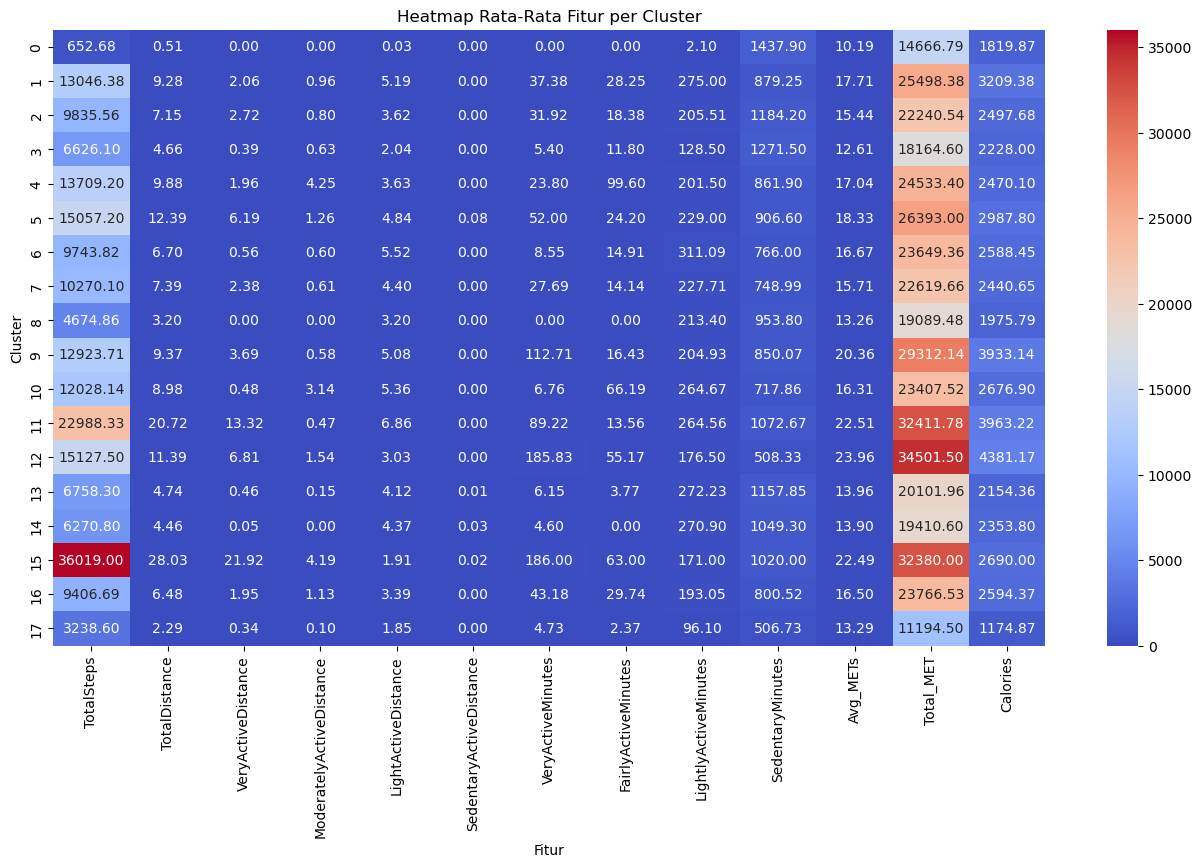

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung rata-rata setiap fitur untuk setiap cluster
cluster_means = df.groupby('Cluster').mean()

# Membuat heatmap dari nilai rata-rata fitur
plt.figure(figsize=(16, 8))
sns.heatmap(cluster_means[columns_to_plot], annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Heatmap Rata-Rata Fitur per Cluster')
plt.xlabel('Fitur')
plt.ylabel('Cluster')
plt.show()


##### Mengurutkan Cluster

Karena pola yang terlihat jelas ada di TotalSteps dan Total_MET, mka akan kita urutkan berdasaarkan ini. Hasilnya msauk ke variabel ActivityRank.

In [217]:
# Menghitung rata-rata Total Steps dan Total MET per cluster
cluster_means_df = df.groupby('Cluster')[['TotalSteps', 'Total_MET']].mean()

# Mengurutkan cluster berdasarkan rata-rata Total Steps dan Total MET secara descending -> Rank 1 paling aktif
sorted_clusters = cluster_means_df.sort_values(['TotalSteps', 'Total_MET'], ascending=[False, False]).index

# Membuat mapping dari urutan cluster ke peringkat aktivitas berdasarkan pengurutan sebelumnya
cluster_activity_rank = {cluster: rank for rank, cluster in enumerate(sorted_clusters, start=1)}

# Simpan di variabel
df['Activity Rank'] = df['Cluster'].map(cluster_activity_rank)

df.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,...,Avg_METs,Total_MET,DayOfWeek,Day,Month,Year,is_weekend,DistancePerStep,Cluster,Activity Rank
0,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,...,17.528472,25241.0,1,12,4,2016,0,0.000646,7,9
1,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,...,15.874306,22859.0,2,13,4,2016,0,0.000649,7,9
2,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,...,15.686806,22589.0,3,14,4,2016,0,0.000644,2,10
3,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,...,15.409722,22190.0,4,15,4,2016,0,0.000643,16,12
4,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,...,16.454167,23694.0,5,16,4,2016,1,0.000644,7,9


Cek urutannya

In [218]:
pd.DataFrame(list(cluster_activity_rank.items()), columns=['Cluster', 'Activity Rank']).sort_values('Activity Rank').reset_index(drop=True)

,Cluster,Activity Rank
0,15,1
1,11,2
2,12,3
3,5,4
4,4,5
5,1,6
6,9,7
7,10,8
8,7,9
9,2,10


Karena ternyata clusternya bisa diurutkan, maka ambil yang ActivityRank, dan tidak menggunakan Cluster lagi. Hal ini untuk membuat machine learning mampu menangkap pola urutan yang ada pada data ini. Tapi kita coba cek dulu di feature selection, apakah skornya lebih tinggi daripada Cluster ataua tidak.

## Fitur Tambahan yang belum ada di dataset

- Data jumlah kalori yang dikeluarkan per hari agar seseorang bisa hidup sehat.
- Goals dari tiap user (apakah olahraga untuk sehat/menurunkan berat badan/alasan lain).
- Data total steps per hari agar seseorang bisa hidup sehat.

## Feature encoding
Semua fitur sudah sekalian di encode saat feature extraction.

## Data Splitting
Data di split sebelum SelectKBest dan sebelum scaling agar menghindari data leakage.

In [219]:
X = df.drop(columns=['Calories'],inplace=False)
y = df['Calories']

In [220]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Feature selection

In [221]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(score_func=mutual_info_regression, k='all')
selector.fit(X_train, y_train)

selected_columns = X_train.columns[selector.get_support()]
scores = selector.scores_[selector.get_support()]

selected_features = pd.DataFrame({'Feature': selected_columns,
                                  'Mutual Information Score': scores
                    }).sort_values(by='Mutual Information Score', ascending=False).reset_index().drop(columns='index')

selected_features

,Feature,Mutual Information Score
0,Total_MET,1.168855
1,Avg_METs,1.028486
2,TotalDistance,0.689380
3,DistancePerStep,0.686997
4,TrackerDistance,0.686073
5,TotalSteps,0.632779
6,SedentaryMinutes,0.517083
7,Activity Rank,0.474555
8,Cluster,0.441004
9,LightlyActiveMinutes,0.431765


Ternyata benar pada hipotesis di section sebelunya bahwa Activity Rank itu lebih bermanfaat dibandingkan hanya cluster saja. Maka fitur Cluster bisa di drop.

Ambil fitur yang scorenya diatas 0.1

In [222]:
selected_features = selected_features[selected_features['Mutual Information Score'] > 0.1]['Feature'].tolist()
selected_features.remove('Cluster')
selected_features

['Total_MET',
 'Avg_METs',
 'TotalDistance',
 'DistancePerStep',
 'TrackerDistance',
 'TotalSteps',
 'SedentaryMinutes',
 'Activity Rank',
 'LightlyActiveMinutes',
 'VeryActiveMinutes',
 'LightActiveDistance',
 'VeryActiveDistance',
 'FairlyActiveMinutes',
 'ModeratelyActiveDistance']

In [223]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

X_train

,Total_MET,Avg_METs,TotalDistance,DistancePerStep,TrackerDistance,TotalSteps,SedentaryMinutes,Activity Rank,LightlyActiveMinutes,VeryActiveMinutes,LightActiveDistance,VeryActiveDistance,FairlyActiveMinutes,ModeratelyActiveDistance
420,23638.0,16.415278,8.12,0.000769,8.12,10553,696,9,228,19,5.29,1.10,42,1.72
290,21690.0,15.062500,3.38,0.000684,3.38,4940,1302,12,52,75,0.55,2.28,11,0.55
133,14612.0,10.147222,0.10,0.000671,0.10,149,1430,18,10,0,0.10,0.00,0,0.00
513,21854.0,15.176389,7.13,0.000811,7.13,8793,717,9,260,2,5.73,0.16,29,1.23
567,26431.0,18.354861,6.08,0.000747,6.08,8135,728,12,140,86,2.10,3.60,16,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,14400.0,10.000000,0.00,0.000000,0.00,0,1440,18,0,0,0.00,0.00,0,0.00
270,17420.0,12.097222,1.70,0.000674,1.70,2524,1272,10,160,0,1.34,0.00,8,0.35
860,21472.0,14.911111,7.35,0.000780,7.35,9423,1151,10,238,7,4.75,0.53,44,2.03
435,22231.0,15.438194,7.38,0.000769,7.38,9603,896,9,199,12,5.09,0.63,39,1.67


In [224]:
X_test

,Total_MET,Avg_METs,TotalDistance,DistancePerStep,TrackerDistance,TotalSteps,SedentaryMinutes,Activity Rank,LightlyActiveMinutes,VeryActiveMinutes,LightActiveDistance,VeryActiveDistance,FairlyActiveMinutes,ModeratelyActiveDistance
299,20404.0,14.169444,5.08,0.000682,5.08,7451,1105,13,335,0,5.06,0.00,0,0.00
63,20656.0,14.344444,5.82,0.000727,5.82,8001,1259,10,135,30,2.64,2.28,16,0.90
136,14650.0,10.173611,0.11,0.000724,0.11,152,1303,16,12,0,0.11,0.00,0,0.00
597,14400.0,10.000000,0.00,0.000000,0.00,0,1440,18,0,0,0.00,0.00,0,0.00
261,19787.0,13.740972,3.95,0.000661,3.95,5980,732,16,227,0,3.95,0.00,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,17776.0,12.344444,2.31,0.000727,2.31,3176,1193,16,120,0,2.31,0.00,0,0.00
148,15565.0,10.809028,1.04,0.000689,1.04,1510,1392,16,48,0,1.04,0.00,0,0.00
281,20993.0,14.578472,5.41,0.000684,5.41,7913,1192,10,213,28,2.91,2.16,7,0.34
591,20918.0,14.526389,3.70,0.000747,3.70,4950,1304,10,79,41,1.45,1.93,16,0.32


# Feature Selection

In [225]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))


In [226]:
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Handle class imbalance

Tidak ada handling class imbalance karena ini kasus regression.